In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms



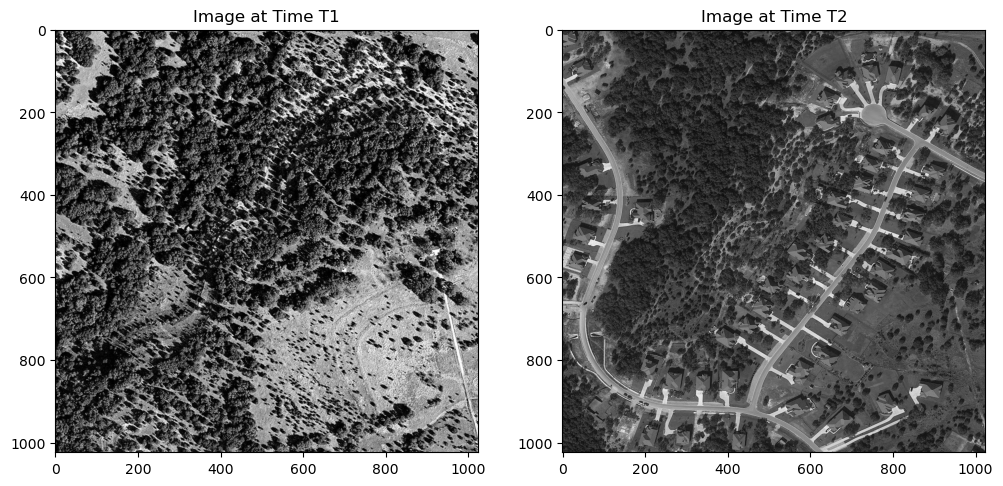

In [83]:

# Load images using OpenCV
# Ensure that you have two images representing two time points (Image_T1 and Image_T2)

image_T1 = cv2.imread('/Users/fernandoareias/Documents/dev/pucrio-pos/imgs/val/A/val_8.png', cv2.IMREAD_GRAYSCALE)
image_T2 = cv2.imread('/Users/fernandoareias/Documents/dev/pucrio-pos/imgs/val/B/val_8.png', cv2.IMREAD_GRAYSCALE)

# Display input images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_T1, cmap='gray')
ax[0].set_title('Image at Time T1')
ax[1].imshow(image_T2, cmap='gray')
ax[1].set_title('Image at Time T2')
plt.show()


# Differencing

In [45]:
# Image differencing is the simplest form of change detection. We subtract one image from the other to identify changes.
image_T1.shape

(1024, 1024)

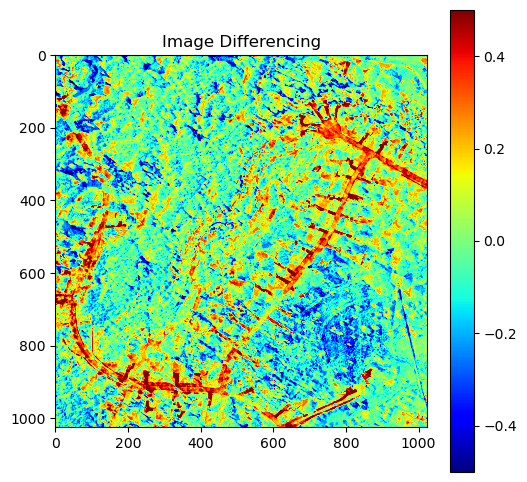

In [85]:
# Para diminuir a diferenca de contraste entre duas imagens 
image_T1 = match_histograms(image_T1, image_T2, channel_axis=-1)
difference_image = image_T2.astype("float32")/255 -  image_T1.astype("float32")/255

# Normalize the difference image for display
# difference_image_normalized = cv2.normalize(difference_image, None, 0, 255, cv2.NORM_MINMAX)

# Display the difference image
plt.figure(figsize=(6, 6))
plt.imshow(difference_image, cmap='jet', vmin=-0.5, vmax=0.5)
plt.title('Image Differencing')
plt.colorbar()
plt.show()

In [49]:
difference_image

array([[-0.14117646, -0.19607845, -0.27058825, ..., -0.03529412,
        -0.00784314, -0.00784314],
       [-0.28235295, -0.23529413, -0.16862746, ..., -0.09411764,
        -0.05882353, -0.05098039],
       [-0.17254904, -0.14901963, -0.10196079, ...,  0.00784314,
         0.03137255,  0.03921568],
       ...,
       [ 0.01568627,  0.00784314,  0.02745098, ..., -0.19607845,
        -0.0862745 , -0.18431374],
       [ 0.1372549 ,  0.00784314, -0.01960784, ..., -0.02352941,
        -0.09803922, -0.12549019],
       [ 0.14117649, -0.08627451, -0.14117646, ..., -0.09411764,
        -0.18039216, -0.18823531]], dtype=float32)

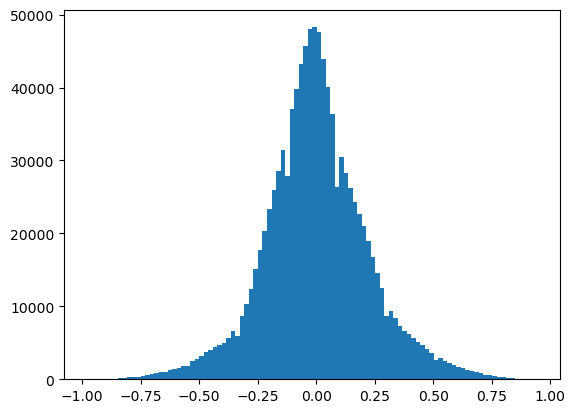

In [51]:
plt.hist(difference_image.ravel(), bins=100)
plt.show()

In [24]:
difference_image.min(), difference_image.max()

(-0.95686275, 0.9843137)

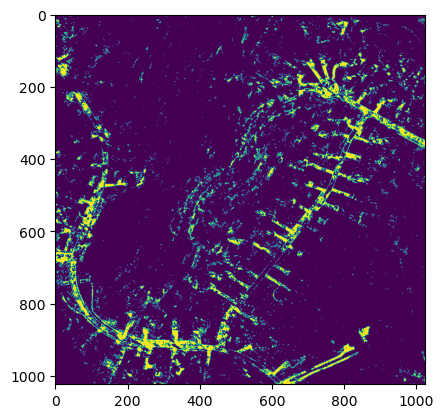

In [53]:
map_img = difference_image.copy()
th = 0.30 
map_img[map_img > th] = 1
map_img[map_img <= th] = 0
plt.imshow(map_img)

In [55]:
map_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

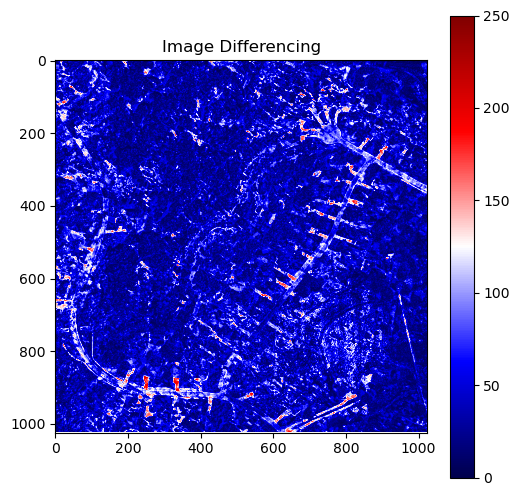

In [61]:

difference_image = cv2.absdiff(image_T2, image_T1)

difference_image_normalized = cv2.normalize(difference_image, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(6, 6))
plt.imshow(difference_image, cmap='seismic')
plt.title('Image Differencing')
plt.colorbar()
plt.show()


 # Image Ratioing

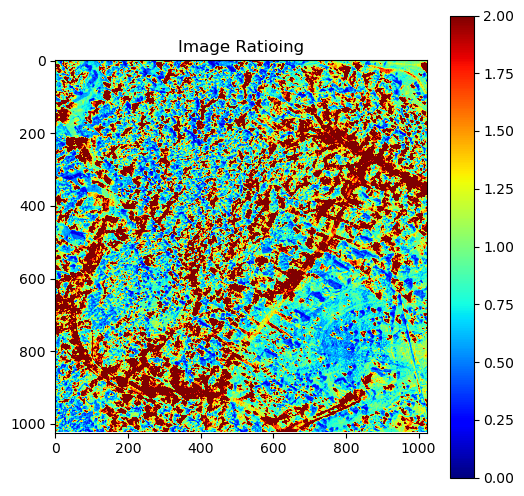

In [87]:
# Image ratioing involves dividing one image by the other to detect relative changes. OpenCV doesn't directly support division, so we'll use numpy.
# To avoid division by zero, we add a small constant to the denominator
epsilon = 1e-5
ratio_image = np.divide(image_T2, (image_T1 + epsilon))

# Normalize for display
# ratio_image_normalized = cv2.normalize(ratio_image, None, 0, 255, cv2.NORM_MINMAX)

# Display the ratio image
plt.figure(figsize=(6, 6))
plt.imshow(ratio_image, cmap='jet', vmax=2)
plt.title('Image Ratioing')
plt.colorbar()
plt.show()

In [63]:
ratio_image.max()

19300000.0

# Magnitude of Change

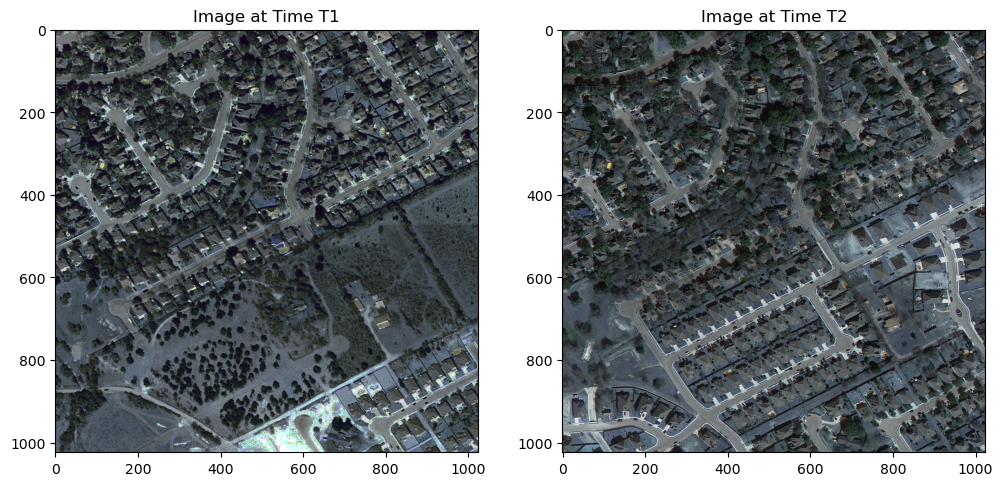

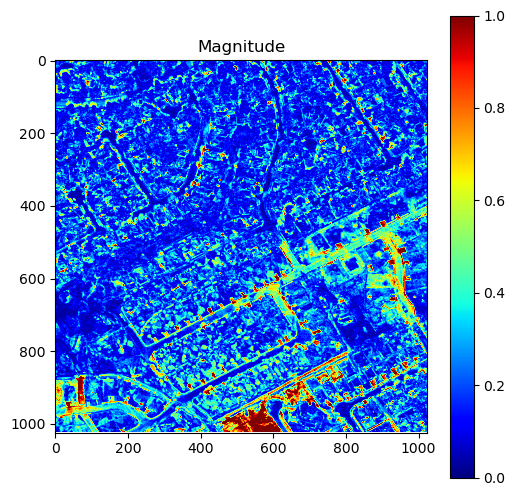

In [70]:
# The magnitude of change is the Euclidean distance between corresponding pixel values.

image_T1 = cv2.imread('/Users/fernandoareias/Documents/dev/pucrio-pos/imgs/val/A/val_21.png')
image_T2 = cv2.imread('/Users/fernandoareias/Documents/dev/pucrio-pos/imgs/val/B/val_21.png')

image_T1 = match_histograms(image_T1, image_T2, channel_axis=-1)

# Display input images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_T1)
ax[0].set_title('Image at Time T1')
ax[1].imshow(image_T2)
ax[1].set_title('Image at Time T2')
plt.show()

image_T1 = image_T1.astype("float32")/255
image_T2 = image_T2.astype("float32")/255

# Magnitudes of the images difference
magnitude = np.linalg.norm(image_T2 - image_T1, axis=-1)

plt.figure(figsize=(6, 6))
plt.imshow(magnitude, cmap='jet', vmax=1)
plt.title('Magnitude')
plt.colorbar()
plt.show()


# Angle Mapper

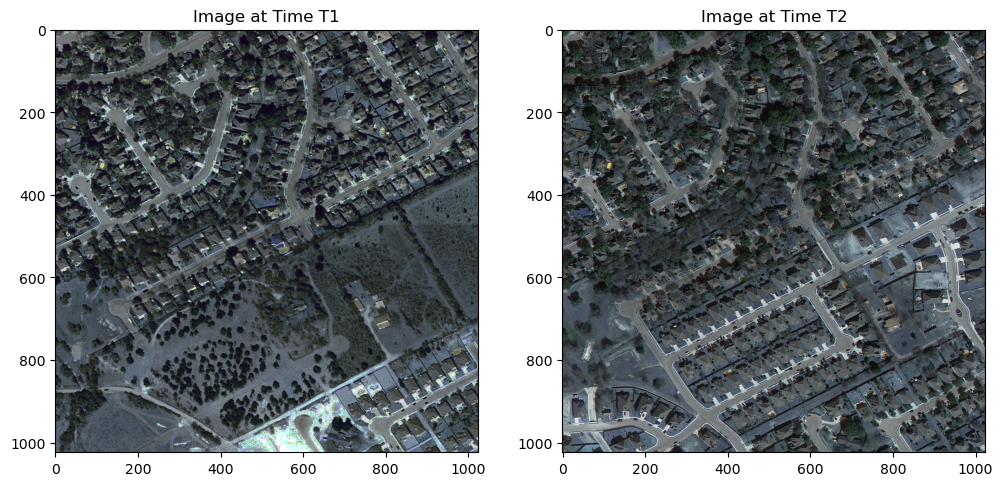

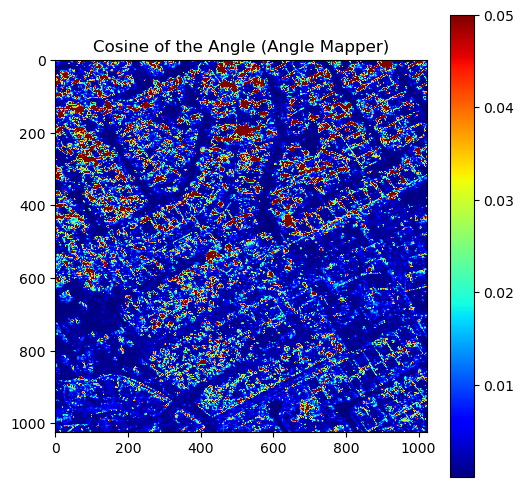

In [77]:
# The angle between vectors of pixel values in multi-band images can be used to detect changes. 
# For simplicity, we'll use grayscale images here, but this method is more effective with multi-band data.

image_T1 = cv2.imread('/Users/fernandoareias/Documents/dev/pucrio-pos/imgs/val/A/val_21.png')
image_T2 = cv2.imread('/Users/fernandoareias/Documents/dev/pucrio-pos/imgs/val/B/val_21.png')

image_T1 = match_histograms(image_T1, image_T2, channel_axis=-1)

# Display input images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_T1)
ax[0].set_title('Image at Time T1')
ax[1].imshow(image_T2)
ax[1].set_title('Image at Time T2')
plt.show()

image_T1 = image_T1.astype("float32")/255
image_T2 = image_T2.astype("float32")/255

# Dot product of the two images
dot_product = np.sum((image_T1 * image_T2), axis=-1)

# Magnitudes of the individual images
magnitude_T1 = np.linalg.norm(image_T1, axis=-1)
magnitude_T2 = np.linalg.norm(image_T2, axis=-1)

# Cosine of the angle
cos_angle = dot_product / (magnitude_T1 * magnitude_T2 + epsilon)

# Display the cosine similarity as an indicator of change
# cos_angle_image = np.full(image_T1.shape, cos_angle)

plt.figure(figsize=(6, 6))
plt.imshow(1-cos_angle, cmap='jet', vmax=0.05)
plt.title('Cosine of the Angle (Angle Mapper)')
plt.colorbar()
plt.show()


In [79]:
cos_angle.min()

0.0